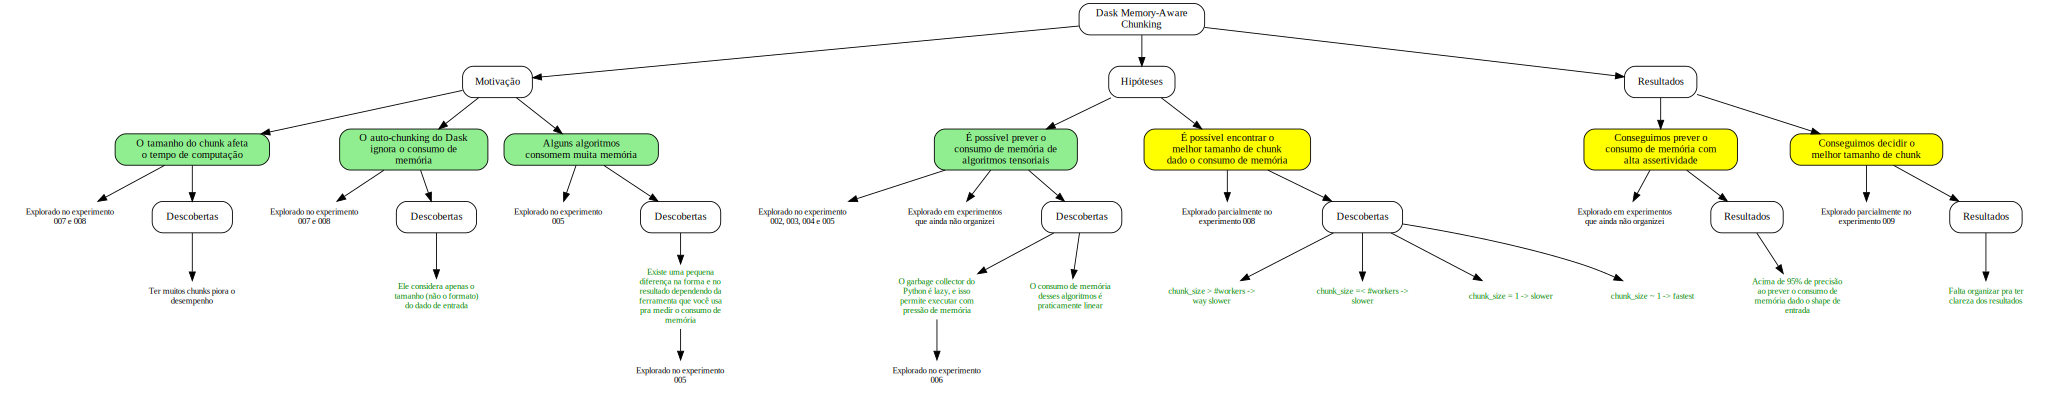

In [62]:
import textwrap

from graphviz import Digraph

graph = Digraph()

def add_node(name, label, *args, max_char_per_line=25, **kwargs):
    wrapped_label = '\n'.join(textwrap.wrap(label, max_char_per_line))
    kwargs = {
        "fillcolor": "white",
        "shape": "box",
        "style": "filled,rounded",
        "fontsize": "12",
        "width": ".5",
        **kwargs,
    }
    graph.node(name, wrapped_label, *args, **kwargs)

def add_edge(*args, **kwargs):
    graph.edge(*args, **kwargs)

add_node('1', 'Dask Memory-Aware Chunking')

# Motivação
add_node('1a', 'Motivação')
add_edge('1', '1a')

add_node('1a1', 'O tamanho do chunk afeta o tempo de computação', fillcolor="lightgreen")
add_node(
    '1a1a',
    'Explorado no experimento 007 e 008',
    shape="plaintext",
    fontsize="10",
)
add_node('1a1b', 'Descobertas')
add_node(
    '1a1b1',
    'Ter muitos chunks piora o desempenho',
    shape="plaintext",
    fontsize="10",
)

add_edge('1a', '1a1')
add_edge('1a1', '1a1a')
add_edge('1a1', '1a1b')
add_edge('1a1b', '1a1b1')

add_node('1a2', 'O auto-chunking do Dask ignora o consumo de memória', fillcolor="lightgreen")
add_node(
    '1a2a',
    'Explorado no experimento 007 e 008',
    shape="plaintext",
    fontsize="10",
)
add_node('1a2b', 'Descobertas')
add_node(
    '1a2b1',
    'Ele considera apenas o tamanho (não o formato) do dado de entrada',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_edge('1a', '1a2')
add_edge('1a2', '1a2a')
add_edge('1a2', '1a2b')
add_edge('1a2b', '1a2b1')

add_node('1a3', 'Alguns algoritmos consomem muita memória', fillcolor="lightgreen")
add_node(
    '1a3a',
    'Explorado no experimento 005',
    shape="plaintext",
    fontsize="10",
)
add_node('1a3b', 'Descobertas')
add_node(
    '1a3b1',
    'Existe uma pequena diferença na forma e no resultado dependendo da ferramenta que você usa pra medir o consumo de memória',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_node(
    '1a3b1a',
    'Explorado no experimento 005',
    shape="plaintext",
    fontsize="10",
)
add_edge('1a', '1a3')
add_edge('1a3', '1a3a')
add_edge('1a3', '1a3b')
add_edge('1a3b', '1a3b1')
add_edge('1a3b1', '1a3b1a')

# Hipóteses
add_node('1b', 'Hipóteses')
add_edge('1', '1b')

add_node('1b1', 'É possível prever o consumo de memória de algoritmos tensoriais', fillcolor="lightgreen")
add_node(
    '1b1a',
    'Explorado no experimento 002, 003, 004 e 005',
    shape="plaintext",
    fontsize="10",
)
add_node(
    '1b1b',
    'Explorado em experimentos que ainda não organizei',
    shape="plaintext",
    fontsize="10",
)
add_node('1b1c', 'Descobertas')
add_node(
    '1b1c1',
    'O garbage collector do Python é lazy, e isso permite executar com pressão de memória',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_node(
    '1b1c2',
    'O consumo de memória desses algoritmos é praticamente linear',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_node(
    '1b1c1a',
    'Explorado no experimento 006',
    shape="plaintext",
    fontsize="10",
)
add_edge('1b', '1b1')
add_edge('1b1', '1b1a')
add_edge('1b1', '1b1b')
add_edge('1b1', '1b1c')
add_edge('1b1c', '1b1c1')
add_edge('1b1c', '1b1c2')
add_edge('1b1c1', '1b1c1a')

add_node('1b2', 'É possível encontrar o melhor tamanho de chunk dado o consumo de memória', fillcolor="yellow")
add_node(
    '1b2a',
    'Explorado parcialmente no experimento 008',
    shape="plaintext",
    fontsize="10",
)
add_node('1b2b', 'Descobertas')
add_node(
    '1b2b1',
    'chunk_size > #workers -> way slower',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_node(
    '1b2b2',
    'chunk_size =< #workers -> slower',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_node(
    '1b2b3',
    'chunk_size = 1 -> slower',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_node(
    '1b2b4',
    'chunk_size ~ 1 -> fastest',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_edge('1b', '1b2')
add_edge('1b2', '1b2a')
add_edge('1b2', '1b2b')
add_edge('1b2b', '1b2b1')
add_edge('1b2b', '1b2b2')
add_edge('1b2b', '1b2b3')
add_edge('1b2b', '1b2b4')

# Resultados
add_node('1c', 'Resultados')
add_edge('1', '1c')

add_node('1c1', 'Conseguimos prever o consumo de memória com alta assertividade', fillcolor="yellow")
add_node(
    '1c1a',
    'Explorado em experimentos que ainda não organizei',
    shape="plaintext",
    fontsize="10",
)
add_node('1c1b', 'Resultados')
add_node(
    '1c1b1',
    'Acima de 95% de precisão ao prever o consumo de memória dado o shape de entrada',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_edge('1c', '1c1')
add_edge('1c1', '1c1a')
add_edge('1c1', '1c1b')
add_edge('1c1b', '1c1b1')

add_node('1c2', 'Conseguimos decidir o melhor tamanho de chunk', fillcolor="yellow")
add_node(
    '1c2a',
    'Explorado parcialmente no experimento 009',
    shape="plaintext",
    fontsize="10",
)
add_node('1c2b', 'Resultados')
add_node(
    '1c2b1',
    'Falta organizar pra ter clareza dos resultados',
    shape="plaintext",
    fontsize="10",
    fontcolor="green"
)
add_edge('1c', '1c2')
add_edge('1c2', '1c2a')
add_edge('1c2', '1c2b')
add_edge('1c2b', '1c2b1')

# Render graph
#graph.render('000-mindmap', format='png')
graph